<a href="https://colab.research.google.com/github/ShedovaNastya/BVT2203_project_workshop/blob/main/notebooks_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Нейрон и нейронная сеть

На вход нейрона подаются сигналы $ x_1, x_2 ... x_n $

Эти параметры умножаются на веса $ w_1, w_2 ... w_n $

Далее они передаются в нейрон, в котором также есть параметр смещения b и получается сумма: $$ z = x_1*w_1 + x_2*w_2 + ... + x_n*w_n + b$$ Результат попадает в функцию активации $$ y=f(z)=f(x_1*w_1 + x_2*w_2 + ... + x_n*w_n + b)$$

Веса и смещения настриваемые параметры

Также можно записать по-другому: $$ y = f(\sum_{i=0}^{N-1} w_i*x_i + b)$$ Запись через скалярное произведение: $$y = f(<\overrightarrow{w} \overrightarrow{x}> + b)$$ Функция активации - пороговая. Нейрон дает сигнал, только когда накапливается заряд.

\begin{equation*}
f(z) =
 \begin{cases}
   0 &\text{if z $\leq 0$}\\
   1&\text{if z $>0$}
 \end{cases}
\end{equation*}
Место, где функция будет менять своё значение с нуля на единицу - разделяющая поверхность.
Разделяющая поверхность находится там, где аргумент функции равен нулю.

Она задаётся вектором $\overrightarrow{w}$ и смещением b, также она является подмножеством пространства векторов

Пороговая функция активации всегда будет равна 1 с той стороны от разделяющей прямой, в которую указывает $\overrightarrow{w}$


Уравнение задает гиперплоскость (прямую, плоскость, N-мерную плоскость)

$\overrightarrow{w}$ является нормалью к гиперплоскости, которая задана этим уравнением

Сигмоида $$\sigma(x) = \frac{1}{1+e^{-x}}$$


Анализ функции:

\begin{equation*}
 \begin{cases}
   x \rightarrow \infty: \sigma(x) \rightarrow 1\\
   x \rightarrow -\infty: \sigma(x) \rightarrow 0\\
   0 < \sigma(x) < 1
 \end{cases}
\end{equation*}

# Базовая работа в PyTorch

In [2]:
!pip install torch

In [3]:
import torch

In [4]:
torch.zeros([3,4])

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [5]:
torch.ones([3,4,5])

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [6]:
torch.Tensor([[1, 2, 3, 4],
             [5, 6, 7, 8],
             [9, 10, 11, 12]])

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])

In [7]:
x = torch.Tensor([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12]])
x

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])

In [8]:
x.size()#узнаем размер

torch.Size([3, 4])

In [9]:
x.shape

torch.Size([3, 4])

In [10]:
x[0]

tensor([1., 2., 3., 4.])

In [11]:
x[1]

tensor([5., 6., 7., 8.])

In [12]:
x[0,0]

tensor(1.)

In [13]:
x[:,0]

tensor([1., 5., 9.])

In [14]:
x + 10

tensor([[11., 12., 13., 14.],
        [15., 16., 17., 18.],
        [19., 20., 21., 22.]])

In [15]:
x ** 2

tensor([[  1.,   4.,   9.,  16.],
        [ 25.,  36.,  49.,  64.],
        [ 81., 100., 121., 144.]])

In [16]:
y = torch.Tensor([[12, 11, 10, 9],
                 [8, 7, 6, 5],
                 [4, 3, 2, 1]])

In [17]:
x + y

tensor([[13., 13., 13., 13.],
        [13., 13., 13., 13.],
        [13., 13., 13., 13.]])

In [18]:
x * y

tensor([[12., 22., 30., 36.],
        [40., 42., 42., 40.],
        [36., 30., 22., 12.]])

In [19]:
x % 2

tensor([[1., 0., 1., 0.],
        [1., 0., 1., 0.],
        [1., 0., 1., 0.]])

In [20]:
x % y

tensor([[1., 2., 3., 4.],
        [5., 6., 1., 3.],
        [1., 1., 1., 0.]])

In [21]:
torch.exp(x)#e в степени x

tensor([[2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01],
        [1.4841e+02, 4.0343e+02, 1.0966e+03, 2.9810e+03],
        [8.1031e+03, 2.2026e+04, 5.9874e+04, 1.6275e+05]])

In [22]:
torch.log(x)#десятичный логарифм

tensor([[0.0000, 0.6931, 1.0986, 1.3863],
        [1.6094, 1.7918, 1.9459, 2.0794],
        [2.1972, 2.3026, 2.3979, 2.4849]])

## Использование масок

In [23]:
mask = x > 3

In [24]:
x[mask]

tensor([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [25]:
x[x > 3]

tensor([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [26]:
x.sum

<function Tensor.sum>

In [27]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
limit = 3

larger_than_limit_sum = x[x > limit].sum()

print(larger_than_limit_sum)

tensor(39)


## Копирование тензоров

In [28]:
y = x
y[0, 0] = 999
print(x)
print(y)#происходит копирование по ссылке, все дублируется впоследствии

tensor([[999,   2,   3],
        [  4,   5,   6],
        [  7,   8,   9]])
tensor([[999,   2,   3],
        [  4,   5,   6],
        [  7,   8,   9]])


In [29]:
x = torch.Tensor([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12]])

In [30]:
y = x.clone()#обычное копирование
y[0,0] = 999
print(x)
print(y)

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])
tensor([[999.,   2.,   3.,   4.],
        [  5.,   6.,   7.,   8.],
        [  9.,  10.,  11.,  12.]])


## Меняем тип данных и точность

In [31]:
x.dtype

torch.float32

In [32]:
x = x.double()
print(x)
x = x.int()
print(x)
x = x.float()
print(x)

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]], dtype=torch.float64)
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]], dtype=torch.int32)
tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])


## Использование библиотеки numpy

In [33]:
import numpy as np
x = np.arange(12).reshape((3,4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [34]:
x = torch.from_numpy(x)
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [35]:
x = x.numpy()
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## Вычисления на GPU


In [36]:
x = torch.rand([2000, 3000])#создаем массив с рандомными числами
x

tensor([[0.4711, 0.8883, 0.1994,  ..., 0.8408, 0.5660, 0.5474],
        [0.4802, 0.6263, 0.7110,  ..., 0.6089, 0.8244, 0.2072],
        [0.9823, 0.0382, 0.8378,  ..., 0.3482, 0.7679, 0.4083],
        ...,
        [0.4130, 0.0255, 0.4682,  ..., 0.6749, 0.3552, 0.4169],
        [0.9902, 0.8600, 0.3665,  ..., 0.1408, 0.1392, 0.8291],
        [0.2512, 0.6384, 0.3345,  ..., 0.2654, 0.3456, 0.3502]])

In [37]:
torch.cuda.is_available()#проверка наличия куды на компьютере

False

In [38]:
torch.device('cuda:0')#девайс, принадлежащий видеокарте(счет начинается с 0)

device(type='cuda', index=0)

In [39]:
torch.device('cpu')#девайс, принадлежащий процессору

device(type='cpu')

In [40]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')#автоматически выбирает девайс
device

device(type='cpu')

In [41]:
x_cuda = x.to(device)#тензор на куде
x_cuda

tensor([[0.4711, 0.8883, 0.1994,  ..., 0.8408, 0.5660, 0.5474],
        [0.4802, 0.6263, 0.7110,  ..., 0.6089, 0.8244, 0.2072],
        [0.9823, 0.0382, 0.8378,  ..., 0.3482, 0.7679, 0.4083],
        ...,
        [0.4130, 0.0255, 0.4682,  ..., 0.6749, 0.3552, 0.4169],
        [0.9902, 0.8600, 0.3665,  ..., 0.1408, 0.1392, 0.8291],
        [0.2512, 0.6384, 0.3345,  ..., 0.2654, 0.3456, 0.3502]])

In [42]:
%time y = (x - x + x * 10.0)**2

CPU times: user 16.8 ms, sys: 62.9 ms, total: 79.7 ms
Wall time: 81.6 ms


In [43]:
%time y_cuda = (x_cuda - x_cuda + x_cuda * 10.0)**2

CPU times: user 24.8 ms, sys: 41.8 ms, total: 66.6 ms
Wall time: 68.5 ms


# Строим первую нейронную сеть


## Восстановление зависимости нейронной сетью


Размеченная обучающая выборка состоит из некоторого количество объектов и для этих объектов мы знаем:
признаки $ x_1, x_2, ... , x_n $ и метку объекта
$ y_1, y_2, ... , y_n $

Перед обучением выборку надо разделить на три датасета:

* **Тренировочный** (используется для обучения нейронной сети)
* **Валидационный** (используется для настройки параметров модели)
* **Тестовый** (используется для проверки окончательного результата)

## Компоненты нейронной сети




### Этапы построения нейронной сети

Представим что нейронная сеть, которую мы должны научить -- это пульт с ручками, а успешно себя вести он будет тогда, когда ручки этого пульта будут в правильном положении.
* **Архитектура нейронной сети** (определиться со структорой взаимодействия нейронов, функцией активации и тд. Придумать, как между аргументом и результатом будут происходить вычисления)
* **Функция потерь**(ее минимум будет соответствовать наилучшему распраспложению "ручек на пульте")
* **Метод оптимизации**(на сколько и как нужно крутить наши "ручки")


Последний нейрон **линейный**. Между этим нейроном и аргументом стоит много сигмоидных нейронов.

Для того, чтобы обучить, необходимо подобрать параметры у выходного нейрона и у нейронов скрытого слоя таким образом, чтобы выходное значение нашей нейронной сети наилучшим образом подходило тому, что мы наблюдали.




## Настройка параметров нашей нейронной сети

веса $w_1^1, w_2^1, ... , w_n^1$ , которые "взвешивают" входных значения в первый и единственный в этой нейронной сети скрытый слой. Эти веса
отвечают за то, насколько круто будет растить соответствующая сигмоида.

Кроме весов скрытого слоя, мы можем настраивать смещеня скрытого слоя $b_1^1, b_2^1, ... , b_n^1$.

Также мы можем настраивать веса второго слоя $w_1^2, w_2^2, ... , w_n^2$

Веса второго слоя будут означать амплитуду соответствующей сигмоиды.

Также мы можем настраивать смещеня второго слоя $b_1^2$

Для настройки параметров нейронной сети будем использовать градиентный спуск. Веса будем описывать вектором
$$
\begin{equation*}
w_0 = \left(
    \begin{array}{c}
    w_0\\
    w_1\\
    \vdots\\
    w_n\\
    \vdots\\
    b_0\\
    b_1\\
    \vdots\\
    b_n
    \end{array}
\right)
\end{equation*}
$$


Далее берём функцию потерь и считаем её производную, а точнее градиент.

Градиент - вектор, состоящий из производных по каждой из координат функции
$$
\begin{equation*}
    \nabla f = \left(
        \begin{array}{c}
        \frac{\partial f}{\partial w_0} \\
        \frac{\partial f}{\partial w_1} \\
        \vdots\\
        \frac{\partial f}{\partial w_n}
        \end{array}
    \right)
\end{equation*}
$$

Градиент функции потерь показывает в сторону наибольшего роста функции потерь.
Поскольку нам надо уменьшение потери, поэтому мы будем двигаться в сторону, обратную градиенту.
Мы получаем новый вектор весов:
$$
w_1 = w_0 - \alpha \nabla f{w_0}
$$
Если мы хотем ещё сильнее минимизировать функцию потерь, мы можем взять градиент от $w_1$
Таким образом мы получим точку
$$
w_2 = w_1 - \alpha \nabla f{w_1}
$$

$\alpha$ - скорость обучения сети, в нашем случае фиксированный коэффициент

При помощи градиентного спуска мы можем делать достаточно большое количество шагов.

Градиентный спуск может найти минимум функции, но не оптимальный!!!!

Ограничения функции потерь:
* функция потерь должна быть **дифференцируема**
* производная **не должна** равняться нулю
$$
 \frac{\partial}{\partial \overline{y_i}} MSE = -\frac{2}{N} (y_i - \overline{y_i})
$$

$\overline{y_i}$ - функция должна была выдать

$y_i$ - результат вывода функции

Мы знаем производную функции потерь. По этой производной нам необходимо вычислить производные всех параметров сети.
$$
L = \bigg(f_4 \Big(f_2 \big(f_1(x)\big)\Big), f_3 \big(f_1(x)\big)\bigg)
$$
$$
\frac{\partial f(g(x))}{\partial x} = \frac{\partial f}{\partial g} \frac{\partial g}{\partial x}
$$



$$
    \frac{\partial L}{\partial w_1} =
    \frac{\partial L}{\partial y_4}[
        \frac{\partial f_4}{\partial y_2}
        \frac{\partial f_2}{\partial y_1}+
        \frac{\partial f_4}{\partial y_3}
        \frac{\partial f_3}{\partial y_1}
    ]
    \frac{\partial f_1}{\partial w_1}
$$

Алгоритм обратного распрастранения ошибки

Starter kit

* архитектура нейронной сети(в каком порядке и как определены нейроны)
* определиться с функцией потерь(дифференцируемая функция, показывающая насколько хорошо решается поставленная задача)
* определиться с методом оптимизации(как настраивать параметры сети, зная производную функции потерь)
* подбор метрик(насколько хорошо обучается нейронная сеть)

## Реализация градиентного спуска в PytTorch

$$f(x) \longrightarrow  \displaystyle \min_{x} $$

$$
x^{t+1} = x^t - \alpha  f'(x^t)
$$
$$
    f(x^{t+1}) = f(x^t - \alpha f'(x^t))
$$

пример
$$
f(x) = 10 * \sum_{ij} x_{ij}^2 \\
f'(X)_X = ? \\
$$
Производная от тензора - градиент
$$
f'(\textbf{X})_{x_{kl}} = \Big( 10\cdot\sum\limits_{i, j}x_{ij}^2\Big)_{x_{kl}}' = 10 \cdot\Big(\sum\limits_{i, j}x_{ij}^2\Big)_{x_{kl}}'
$$

$$ \quad = 10 \cdot\sum\limits_{i, j}\Big(x_{ij}^2\Big)_{x_{kl}}' $$

$$ \quad = 10 \cdot\sum\limits_{i, j}2 x_{ij} \big(x_{ij}\big)_{x_{kl}}' $$

$$ \quad = 10 \cdot 2 x_{kl} \cdot 1 = 20 x_{kl} $$

$$f(\textbf{X}) = 10\cdot\sum\limits_{i, j}x_{ij}^2$$

$$f'(\textbf{X})_{\textbf{X}} = 20 \textbf{X} $$

In [44]:
import torch
x = torch.tensor([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12]], dtype=float, requires_grad=True) # requires_grad=True сообщает о том,
                  #что данный тензор является переменной, по которой нужно будет считать градиенты и
                  #превращает тензор-константу в тензор-переменную

In [45]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
x = x.to(device) #подключение тензора к вычислительной мощности
x

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]], dtype=torch.float64, requires_grad=True)

In [46]:
function =  10 * (x ** 2).sum()
#составление функции зависящую от тензора X, который является переменной
function
function.backward() #вычисление производной функции, метод применяется к функции, ничего не возвращает

In [47]:
x.grad #метод, который возвращает результат нахождения градиента функции

tensor([[ 20.,  40.,  60.,  80.],
        [100., 120., 140., 160.],
        [180., 200., 220., 240.]], dtype=torch.float64)

In [48]:
print(function.grad_fn) #последняя операция дифференцирования
print(function.grad_fn.next_functions[0][0])
print(function.grad_fn.next_functions[0][0].next_functions[0][0])
print(function.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0]) #первая операция дифференцирования

In [49]:
#РЕАЛИЗАЦИЯ ГРАДИЕНТНОГО СПУСКА ПО ФОРМУЛЕ
x.data -= 0.001 * x.grad
#атрибут .data позволяет обновить не сам тензор, а ТОЛЬКО ДАННЫЕ В НЕМ

Если мы будем производить операции градиента многократно: в pytorch для удобства градиенты не обновляются после выполнения градиентных шагов. Они всё время накапливаются то есть суммируются. Результат - сумма прошлого градиента и текущего. Для того, чтобы такое не происходило необходимо обнулять градиент

In [50]:
x.grad.zero_() #метод обнулит весь градиент

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=torch.float64)

In [51]:
import torch

w =  torch.tensor([[5, 10],
                   [1, 2]], dtype=float, requires_grad=True)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
w = w.to(device)
function =  torch.log(torch.log(w + 7))
function.backward(w)

print(w.grad) # Код для самопроверки

tensor([[0.1677, 0.2076],
        [0.0601, 0.1011]], dtype=torch.float64)


In [52]:
import torch

w =  torch.tensor([[5., 10.],
                   [1., 2.]], requires_grad=True)
alpha = 0.001

for i in range(500):
  function = (w + 7).log().log().prod()
  function.backward()
  w.data -= alpha * w.grad
  w.grad.zero_()

print(w)

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)


In [53]:
x = torch.tensor([8., 8.], requires_grad = True)

def parabola(variable):
    return 10 * (variable ** 2).sum()

def make_gradient_step(function, variable):
    function_result = function(variable) #вычисление значения по функции
    function_result.backward() #нахождение производной
    variable.data -= 0.001 * variable.grad #градиентный спуск
    variable.grad.zero_() #обнуление градиента

for i in range(500):
    make_gradient_step(parabola, x)

In [54]:
x = torch.tensor([8.,8.], requires_grad = True)

optimizer = torch.optim.SGD([x], lr=0.001)
#оптимайзер - объект, котоорый знает как делать градиентные шаги
#SGD - стохастический градиентный спуск из пакета optim
#мы передаем переменную, с которой будем осуществлять градиентный спуск и learning rate

def parabola(variable):
  return 10 *(variable ** 2).sum()

def make_gradient_step(function, variable):
  function_result = function(variable)#вычисление значения по функции
  function_result.backward()#нахождение производной
  optimizer.step()#градиентный спуск
  optimizer.zero_grad()#обнуление градиента

for i in range(500):
  make_gradient_step(parabola, x)


Если мы хотим визуализировать то, что у нас получается вследствие градиентного спуска, мы можем
попробовать нарисовать график линий функции, которую мы оптимизируем.

 В нашем случае, это круги(линии, на которых
функция имеет одно и то же значение) и красными точками отмечена некоторая траектория движения икса,
то есть траектория переменной икс, которую она проходит в процессе градиентного спуска.

 Мы начинали с начального приближения
с точки (8,8). Мы видим, что наш градиентный спуск действительно спускается в минимум функции, в точку (0.0)

In [55]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def show_contours(objective, #функция, которая будет вычислять значение переменной в каждой точке
                  x_lims=[-10.0, 10.0], #границы по ОХ
                  y_lims=[-10.0, 10.0], #границы по ОУ
                  x_ticks=100, #количество точек по ОХ для вычисления значений функции
                  y_ticks=100): #количество точек по ОУ для вычисления значений функции
    x_step = (x_lims[1] - x_lims[0]) / x_ticks #вычисление шагов на основе границ и количества точек по OX
    y_step = (y_lims[1] - y_lims[0]) / y_ticks #вычисление шагов на основе границ и количества точек по OY
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step] #np.mgrid создание сетки значений Х и У, содержащие координаты каждой точки
    res = [] #список, в котором будут содержаться значения каждой функции на сетке
    for x_index in range(X.shape[0]): #проход через каждую точку на сетке
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T)) #получение значение функции для текущей точки и добавление на соответствующую позицию
    res = np.array(res)
    plt.figure(figsize=(7,7)) #создание новой фигуры для установки размеров графика
    plt.contour(X, Y, res, 10) #создание контуров на основе X,Y, res. 100 - количество контуров
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

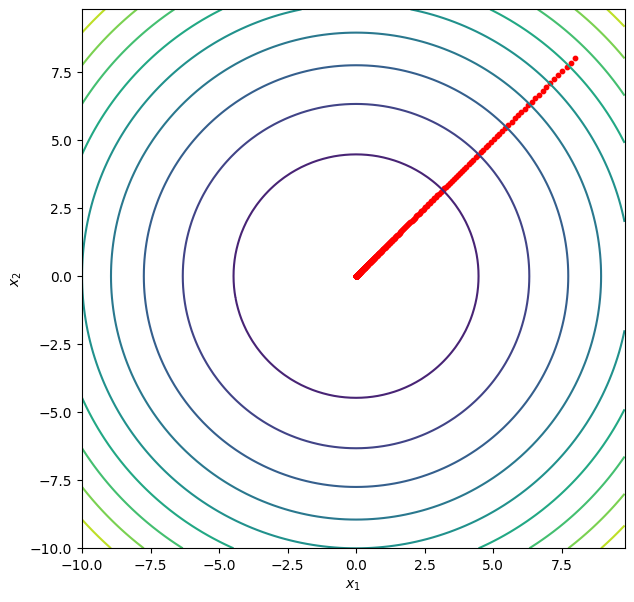

In [56]:
import torch

x = torch.tensor(
    [8., 8.], requires_grad=True)
var_history = []
fn_history = []

optimizer = torch.optim.SGD([x], lr=0.001)

def function_parabola(variable):
    return 10 * (variable ** 2).sum()

def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    optimizer.step()
    optimizer.zero_grad()

for i in range(500):
    var_history.append(x.data.numpy().copy())
    fn_history.append(function_parabola(x).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, x)

show_contours(function_parabola)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=10, c='r');
#plt.scatter - добавление точек на график
#первые два массива задают координаты точек Х и У, s - размер, с - цвет

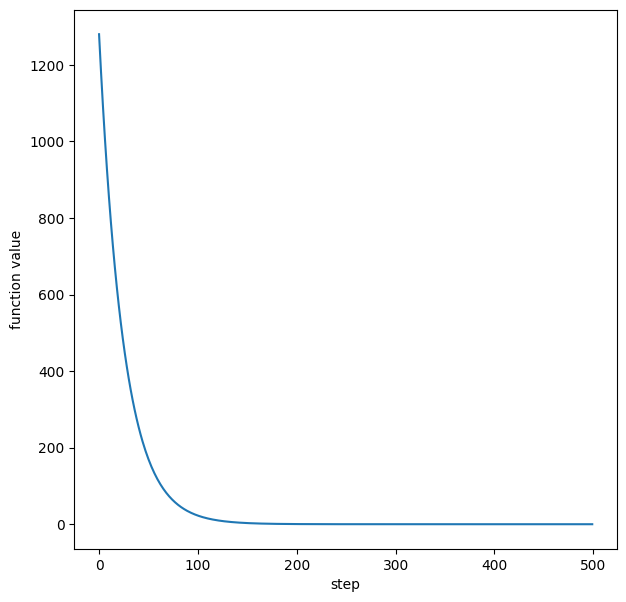

In [57]:
plt.figure(figsize=(7,7))
plt.plot(fn_history);
plt.xlabel('step')
plt.ylabel('function value');

# Задачи, решаемые при помощи нейронных сетей

## Бинарная классификация, бинарная кросс-энтропия

Выбор функции потерь не зависит от характеристик модели

Сигмоида

$$ \sigma(y) = \frac{1}{1 + e^{-y}}$$

Производная сигмоиды

$$ \sigma'(y) = \sigma(y)(1 - \sigma(y))$$

$$MSE = (\sigma(y) - t)^2$$

$$MSE' = 2*(\sigma(y)-t)*\sigma(y)*(1-\sigma(y))$$

Возникает паралич сигмоидной нейронной сети

Даже при большом количестве ошибки может возникнуть производная, которая будет равна 0. Градиентный спуск плохо подходит для обучения такой нейронной сети.Потому что функция ошибки сосотоит из трех компонент, одна из которых отклнение, и остальные не зависят от нее.



В качестве потерь с сигмоидной функцией активации можно использовать функцию "Бинарная кросс-энтропия"
$$
 BCE(p, t) = -t \log(p) - (1-t)\log(1-p)
$$




$$
p = \sigma(y)
$$

$$
\frac{\partial BCE}{\partial y} = \frac{\partial BCE}{\partial p} \frac{\partial p}{\partial y} = -\frac{t}{\sigma} \sigma' + \frac{1-t}{1-\sigma}\sigma'= -t(1-\sigma) + (1-t)\sigma = \sigma - t
$$


Бинарная кросс-энтропия - функция потерь, которая хорошо оценивает вероятности и любые значения, которые находятся в интервале от $[0,1]$


**Функция активации - сигмоида**

**Функция потерь - бинарная кросс-энтропия**

## Многоклассовая классификация. СОФТМАКС

Для решения многоклассовой классификации предлагается сделать по одному выходу на каждый класс. Для получения вероятности для каждого класса будем использовать другой подход

Сумма всех вероятностей(выходов) должна равняться единице.

В таком примере в **качестве функции активации** мы будем применять функцию "СофтМакс"

$$
SM_i(\vec{y})=\frac{e^{y_i}}{\sum^N_{j=1} e^{y_j}}
$$

Мы берём все выходы из сети и в эту степень возводим экспоненту. После этого для того, чтобы получить вероятность какого-то класса, мы берём экспоненту, которая соответствует этому классу, и делим на сумму всех экспонент(потому что вероятность не может быть больше 100%)

Свойства софтмакс функции:
- $0<SM<1$
- $\sum_{i=1}^N SM_i = 1$

Продифференцируем софтмакс функцию:
$$
\frac{\partial SM_i}{\partial y_c} = \frac{-e^{y_i}e^{y_c}}{(\sum^N_{j=1}e^{y_j})^2}; y_c \neq y_i
$$
$y_c$ - некоторый выход из нейронной сети

Производная софтмакса по выходу:

$$
\frac{\partial SM_i}{\partial y_i}=\frac{e^{y_i}*\sum^n_{j=1}e^{y_j} - e^{y_i}*e^{y_i}}{(\sum_{j=1}^N e^{y_j})^2} = SM_i(1-SM_i)
$$

$$
\frac{\partial}{\partial y_i} \sum^n_{j=1} e^{y_j} = \frac{\partial}{\partial y_i} e^{y_i} = e^{y_i}
$$


Кросс энтропия - минус сумма всех классов от 1 до N.

$t_c$ - таргетное значение для класса

$p_c$ - вероятность этого класса

Верояность класса - софтмакс от выходов из нейронной сети.

Таргетное значение для класса - ноль почти для всех классов кроме одного, который присутствует на этой картинке

Когда у нас будет два класса, софтмакс будет выглядеть как сигмоида. Кросс энтропия на два класса выглядит как бинарная кросс энтропия

Кросс энтропия - хорошая функция потерь для функции активации софтмакс

$$
\frac{\partial CE}{\partial y_i} = -\frac{t_i}{p_i} \frac{\partial SM_i}{\partial y_i} - \sum_{c \neq i} \frac{t_c}{p_c} \frac{\partial SM_c}{\partial y_i}$$
$$ = - \frac{t_i}{p_i} p_i(1-p_i)+ \sum_{c \neq i} t_c \frac{1}{p_c} p_i p_c = -t_i(1-p_i) + \sum_{c \neq i} t_c p_i = -t_i + p_i
$$

Производная кросс энтропии по выходу из нейронной сети линейна

**Функция активации - софтмакс**

**Функция потерь - кросс-энтропия**

## Локализация, детекция, сегментация и super-resolution


### Задача локализации и детекции

У нас есть картинка. На этой картинке где-то есть объект. Что нужно сделать для решения этой задачи?

- Один из выходов нейронной сети должен говорить о вероятности нахождения на картинке объекта. (p)
- Параметризация прямоугольника, включащего в себя объект $x_c, y_c$ - координаты центра
- ширина (w) и высота (h)

Эта задача будет решаться с некоторым количеством ограничений:
- на картинке может быть либо один объект, либо ни одного
- если центр объекта лежит в пределах картинки, то мы считаем, что объект на картинке есть, в ином случае, мы считаем, что его нет.
- объект может выходить за пределы картинки



На выход вероятности можно использовать сигмоидную функцию активации.

На выходы центра можно также использовать сигмоидную функции активации. Таким образом мы сможем задать центр объекта относительно картинки.

Высота и ширина - экспоненты от соответствующих выходов

На выходы вероятности, центра в качестве функции потерь можно использовать бинарную кросс энтропию

В качестве функции потерь для высоты и ширины можно использовать средний квадрат ошибки от выхода сети до функции активации с логарифмом таргетного значения

$$
p = \sigma(y_0);    BCE(\sigma(y_0), \widetilde{I})\\
x_c = \sigma(y_1);  BCE(\sigma(y_1), \widetilde{x_c})\\
y_c = \sigma(y_2);  BCE(\sigma(y_2), \widetilde{y_c})\\
w = \exp(y_3);      MSE(y_3, \log{\widetilde w})\\
h = \exp(y_4);      MSE(y_4, \log{\widetilde h})
$$

$$
L = BCE(\sigma(y_0), \widetilde{w}) + \widetilde I \Bigg(BCE(\sigma(y_1), \widetilde{x_c})+BCE(\sigma(y_2), \widetilde{y_c})+MSE(y_3, \log{\widetilde w}))+MSE(y_4, \log{\widetilde h}\Bigg)
$$


### Сегментация

На выходе из нейросети будет картинка, где каждый пиксель дифференцируется(есть кот или нет)

Функция активации - сигмоида
Функция потерь - бинарная кросс энтропия по каждому пикселю и сложения по всех картинке

$$
L = \sum_j BCE(\sigma(y_j), t_j)
$$

### Задача сжатия размерности

Это задача попадает в разряд задач обучения без учителя.

Сделать сеть, которую будем называть кодировщиком(инкодер). Она будет выдавать сжатое представление картинки(имбеддинг). Это изображение мы будем расшифровать при помощи сети, которая называется декодировщик(декодер). В результате мы должны получать такую же картинку, какая была на входе.

В качестве лосс функции можно взять среднеквадратичную ошибку между тем, что было и что получилось.

$$
L = \sum_j MSE(Img_j, \widetilde{Img_j})
$$

### Задача SuperResolution

увеличение изображения
сжимаем картинки, отдаём нейросети и результат сравниваем с исходным

##Первое обучение нейронной сети

In [58]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)
# .rcParams - словарь из глобальный настроек графиков
# figure.figsize - размер графика

In [59]:
import torch

###Train dataset

Text(0.5, 1.0, 'y = sin(x)')

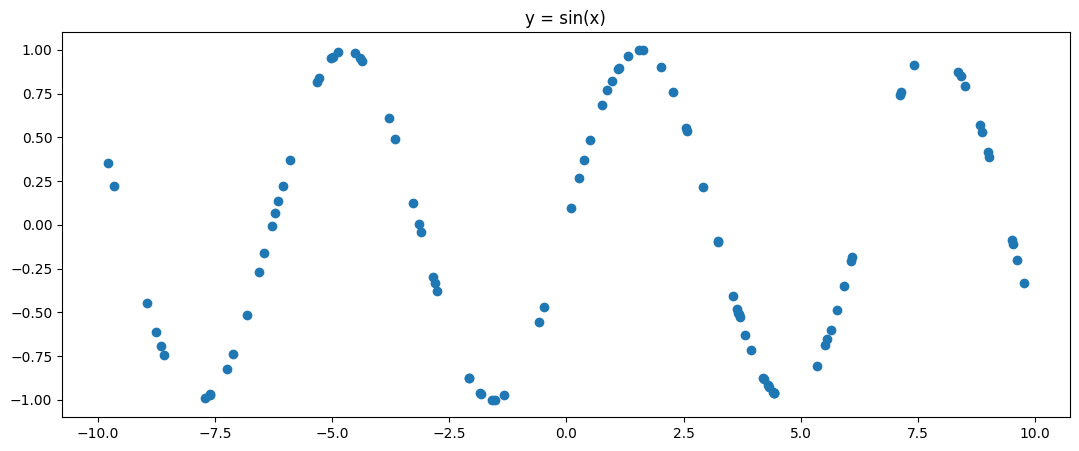

In [60]:
x_train = torch.rand(100)#для равномерного распределения берем сто рандомных чисел из [0,1]
x_train = x_train * 20.0 - 10.0#точки расставляем примерно по центру графика

y_train = torch.sin(x_train)#задача регрессии для синуса. y = sin(x)

plt.plot(x_train.numpy(),y_train.numpy(), 'o')#cоздаем график,координаты по x и y,'o' - стиль(здесь точка)
plt.title('y = sin(x)')

Обучающая выборка простая, добавляем шума

Text(0.5, 1.0, 'Gaussian noise')

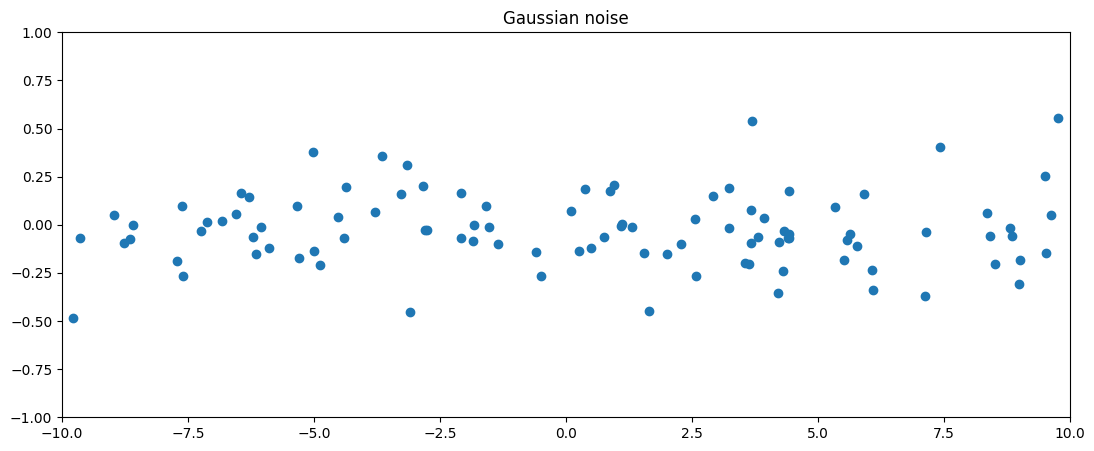

In [61]:
noise = torch.randn(y_train.shape) / 5#генерация из нормального распределения

plt.plot(x_train.numpy(), noise.numpy(),'o')
plt.axis([-10, 10, -1, 1])#задаем максимальные и минимальные значения осей по x и y
plt.title('Gaussian noise')


Text(0, 0.5, 'y_train')

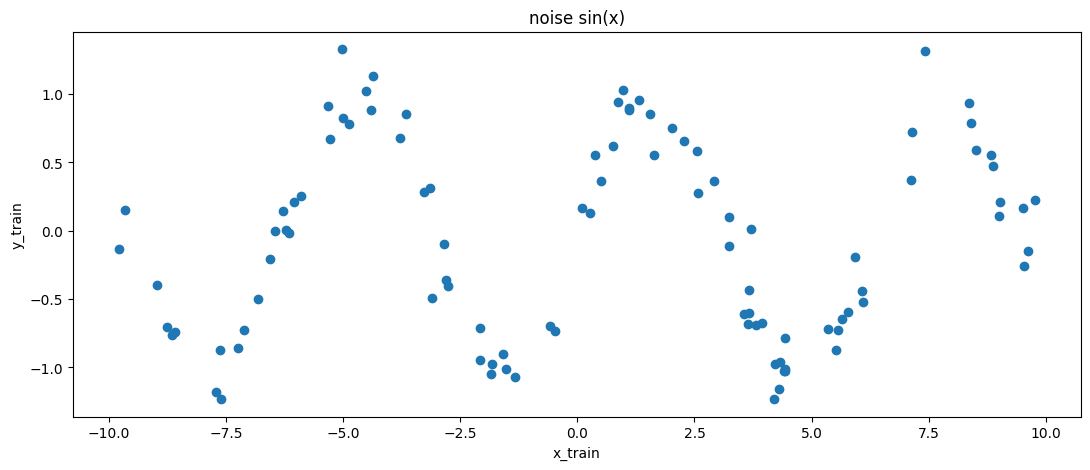

In [62]:
y_train = y_train + noise
plt.plot(x_train.numpy(),y_train.numpy(),'o')
plt.title('noise sin(x)')
plt.xlabel('x_train')#оси
plt.ylabel('y_train')


In [63]:
x_train.unsqueeze_(1) #трансплонирование одномерного вектора
y_train.unsqueeze_(1);

In [64]:
tmp = torch.Tensor([1, 2, 3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


###Validation dataset

Text(0, 0.5, 'y_validation')

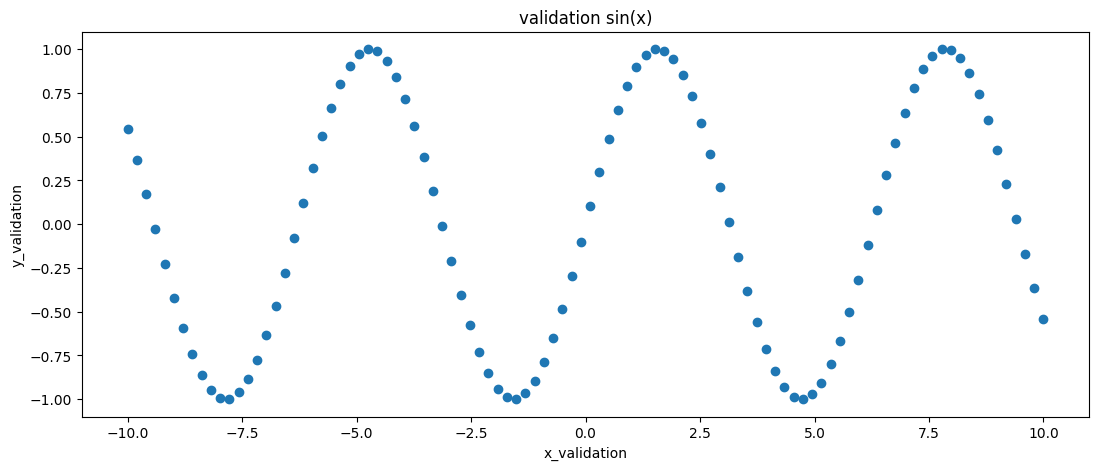

In [65]:
x_validation = torch.linspace(-10,10,100)#сто точек равномерно распределены [-10;10]
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('validation sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation')

In [66]:
x_validation.unsqueeze_(1)#_означает трансформацию объекта
y_validation.unsqueeze_(1);#установка правильной размерности

### model construction

In [67]:
class SineNet(torch.nn.Module): #создаем класс,наследуем от данного модуля, потому что в нём есть необходимые нам модули
  def __init__(self, n_hidden_neurons): #функция инициализации. В неё передаются те аргументы, что используются в момент конструирования нейросети
    #мы передаём количество нейронов скрытого слоя
    #мы предполагаем, что все слои будут одинакового размера
    #когда мы создаём слои, они инициализируются некоторыми случайными числами

    super(SineNet, self).__init__() #инициализируем родительский объект

    #создание слоев
    #первый слой fc1
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons) #в пайторче полносвязные слой называется Linear
    #мы передаём количество входных нейронов(1) и количество выходных нейронов (n_hidden_neurons)
    #это по сути не сам нейрон, а вход в него, координата нашей точки, по которой мы будем что-то предсказывать

    #функция активации
    self.act1 = torch.nn.Sigmoid() # сигмоидная функция активации

    #еще один полносвязнный слой. Один нейрон и есть ответ на вопрос
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

  #пишем функцию, в которой все слои будут последовательно применятся
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x

sine_net = SineNet(50) #создание нейросети




### Зачем мы делим датасет на 3 части

* Validation нужна, чтобы подобрать гиперпараметры сети

  В процессе экспериментов с сетью мы могли "подогнать" гиперпараметры под данные в validation. Значит, чтобы получить "честное" качество, нам нужен test

  Если бы мы обучались на полном датасете и на нем же валидировались, то не заметили бы переобучения (когда сетка "запомнила" выборку)

  Validation нужна, чтобы посмотреть качество работы сетки на данных, которых не было в обучении

* Train нужен для обучения

* Test нужен для финальной оценки качества работы сети

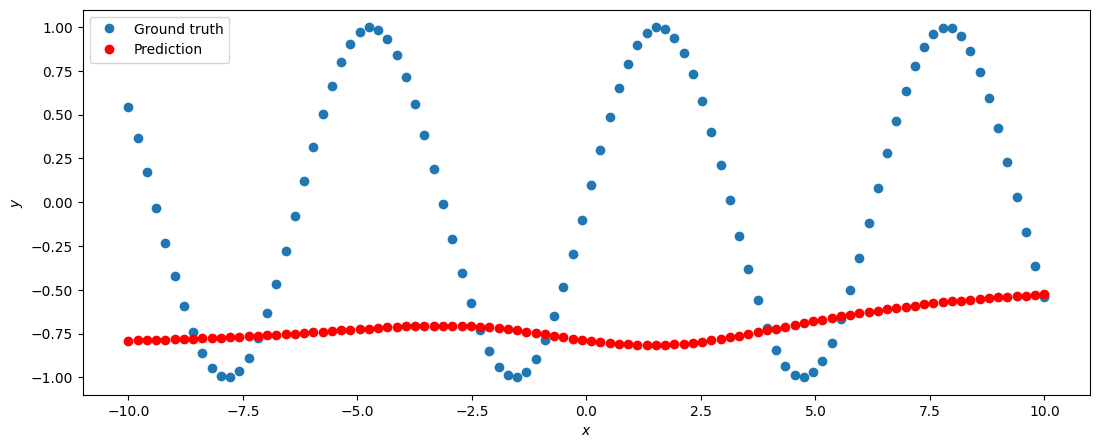

In [68]:
def predict(net, x, y):
  y_pred = net.forward(x)
# рисует сам Prediction
  plt.plot(x.numpy(), y.numpy(), 'o', label='Ground truth')#то, что мы бы хотели на валидации увидеть
  plt.plot(x.numpy(), y_pred.data.numpy(), 'o',
           c = 'r', label='Prediction');#то, что сеть предсказала
  plt.legend(loc = 'upper left')
  plt.xlabel('$x$')
  plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

### Optimizer

In [69]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr = 0.01)
#оптимизатор - объект, который реализует шаги градиентного спуска
#.parametrs - мы влияем именно на веса нейронной сети

### Loss function

In [70]:
def loss(pred, target):
  squares = (pred - target)** 2 #MSE
  return squares.mean()

### Training procedure

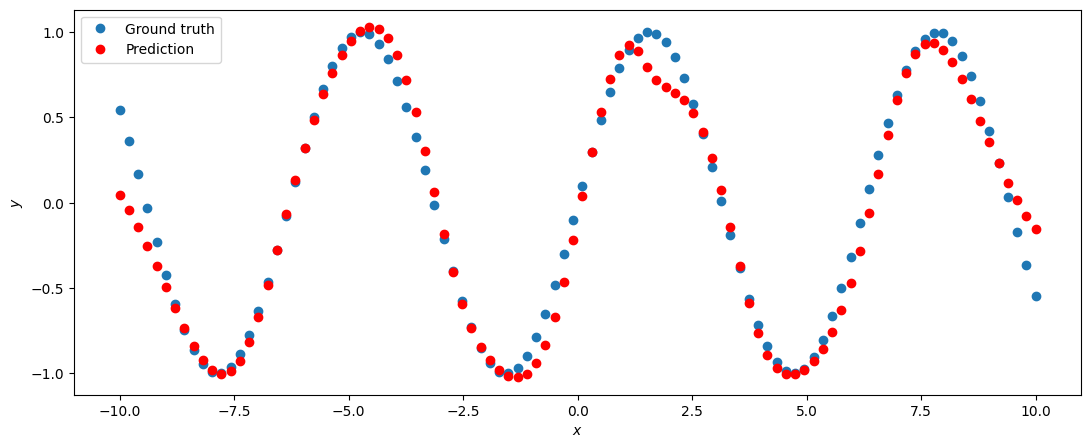

In [71]:
for epoch_index in range(2000):#у нас 2000 эпох
    optimizer.zero_grad() #зануляем градиент

    y_pred = sine_net.forward(x_train) #считываем наш датасет

    loss_val = loss(y_pred, y_train) #значение потерь

    loss_val.backward() #считаем градиенты

    optimizer.step() #шаг градиента

predict(sine_net, x_validation, y_validation)

## Классификация в PyTorch

In [72]:
import torch
import random
import numpy as np
#мы всегда будем использовать нулевую последовательность при вызове генератора random
random.seed(0)#фиксируем сиды генератора случайных чисел python
np.random.seed(0)#фиксируем сиды генератора случайных чисел  NumPy
torch.manual_seed(0)#фиксируем сиды генератора случайных чисел PyTorch на cpu
torch.cuda.manual_seed(0)#для gpu
torch.backends.cudnn.deterministic = True#дает возможность воспроизведения при использовании библиотеки CuDNN для вычисления на gpu

### Для задач классификации используем датасет Wine

In [73]:
import sklearn.datasets #модуль с датасетом wine
wine = sklearn.datasets.load_wine()#импортируем датасет wine
wine.data.shape#есть 178 бутылок вин(каждая имеет 13 параметров), каждую можно классифицировать на три класса

(178, 13)

In [74]:
from sklearn.model_selection import train_test_split #импорт необходимой функции

X_train, X_test, Y_train, Y_test = train_test_split( #разбиваем на train и test датасеты
    wine.data[:, :2], #берем две колонки из 13 (для удобства визуализации)
    wine.target, #те классы, которые нам надо предсказать, их номера
    test_size = 0.3, #отрежем 30% для test
    shuffle = True #перемешиваем датасет на случай, если он был отсортирован
)
X_train = torch.FloatTensor(X_train) #дробные
X_test = torch.FloatTensor(X_test)
Y_train = torch.LongTensor(Y_train) #целые
Y_test = torch.LongTensor(Y_test)

In [75]:
class WineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(WineNet, self).__init__()
    self.fc1 = torch.nn.Linear(2, n_hidden_neurons)#на входе две колонки
    self.act1 = torch.nn.Sigmoid()#можно что угодно
    self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
    self.act2 = torch.nn.Sigmoid()
    self.fc3 = torch.nn.Linear(n_hidden_neurons,3)#выдает 3 нейрона(отвеают за свои классы)
    self.sm3 = torch.nn.Softmax(dim=1)#к каждой строке применяем

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    return x
    #экспаненты и логарифмы взаимоуничтожаются, поэтому можем вычислить кросс энтропию, не считая софтмакс
    #софтмакс долгая для вычисления, её нужно стараться избегать
  def inference(self, x):#софтмакс долгая, поэтому отдельно
    x = self.forward(x)
    x = self.sm(x)
    return x
wine_net = WineNet(5)


In [76]:
loss = torch.nn.CrossEntropyLoss()#использует не выходы после софтмакса, а выходы нейронной сети еще до прохода в софтмакс

optimizer = torch.optim.Adam(wine_net.parameters(), lr=0.01)#0.01 -  cтандартное значение


In [77]:
np.random.permutation(5)

array([2, 0, 1, 4, 3])

In [94]:
batch_size = 10 #вырезаем из нашего датасета участки длиной batch_size

for epoch in range(10000):
  order = np.random.permutation(len(X_train)) #порядок индексов, которые нужно применить к датасету
  for start_index in range(0, len(X_train), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index + batch_size]#индексы, соответствующие конкретному batch

    x_batch = X_train[batch_indexes]#получаем и данные и ответ
    y_batch = Y_train[batch_indexes]

    preds = wine_net.forward(x_batch)#пропускаем весь batch через сеть(выходы на последних трех нейронах)

    loss_val = loss(preds, y_batch)
    loss_val.backward()

    optimizer.step()#шаг градиентного спуска

#выисляем метрики на тест датасете, чтоб посмотреть обучаеется сеть или нет
  if epoch % 100 == 0:#
    test_preds = wine_net.forward(X_test)#каждые сто эпох
    test_preds = test_preds.argmax(dim=1) #выисляем максимальный выход
    # чтобы понять какой класс предсказывает нейросеть не обязательно вычислять через софтмакс вероятность
    # макс выход и есть выход с макс вероятностью
    print((test_preds == Y_test).float().mean())#совпадение нейрона с макс выходом с правильным классом

tensor(0.8333)
tensor(0.8148)
tensor(0.8148)
tensor(0.8333)
tensor(0.8333)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8333)
tensor(0.8519)
tensor(0.8519)
tensor(0.8148)
tensor(0.8333)
tensor(0.8148)
tensor(0.8519)
tensor(0.8519)
tensor(0.8148)
tensor(0.8519)
tensor(0.8333)
tensor(0.8519)
tensor(0.8519)
tensor(0.8333)
tensor(0.8333)
tensor(0.8519)
tensor(0.8148)
tensor(0.8519)
tensor(0.7963)
tensor(0.8148)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8519)
tensor(0.8519)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8148)
tensor(0.8519)
tensor(0.8519)
tensor(0.8333)
tensor(0.8519)
tensor(0.8519)
tensor(0.8148)
tensor(0.8333)
tensor(0.8148)
tensor(0.8333)
tensor(0.8519)
tensor(0.8148)
tensor(0.8148)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8148)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8519)
tensor(0.8148)
tensor(0.8519)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8519)
tensor(0.8333)
tensor(0.8333)
tensor(0.8

KeyboardInterrupt: ignored

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем размеры графика
plt.rcParams['figure.figsize'] = (10, 8)

# Задаем количество классов, цвета и шаг для отображения
n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

# Определяем диапазоны значений для осей x и y
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

# Создаем сетку точек для отображения
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Преобразуем входные данные в тензор PyTorch
input_data = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Передаем данные через модель
with torch.no_grad():
    intermediate = wine_net.fc1(input_data)
    intermediate = wine_net.act1(intermediate)
    preds = wine_net.fc3(intermediate)
    preds = wine_net.sm(preds)  # Применяем софтмакс для получения вероятностей классов

# Преобразуем предсказания в массив NumPy
preds_class = preds.argmax(dim=1).detach().numpy()
preds_class = preds_class.reshape(xx.shape)

# Отображаем контурные линии предсказанных классов
plt.contourf(xx, yy, preds_class, cmap='Accent')

# Отображаем обучающие точки
for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(Y_train == i)
    plt.scatter(X_train[indexes, 0],
                X_train[indexes, 1],
                c=color,
                label=wine.target_names[i],
                cmap='Accent')

# Добавляем подписи осей и легенду
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.legend()

# Отображаем график
plt.show()


AttributeError: ignored

In [92]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Задаем размеры графика
plt.rcParams['figure.figsize'] = (10, 8)

# Задаем количество классов, цвета и шаг для отображения
n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

# Определяем диапазоны значений для осей x и y
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

# Создаем сетку точек для отображения
xx, yy = torch.meshgrid(torch.arange(x_min, x_max, plot_step),
                     torch.arange(y_min, y_max, plot_step))

preds = wine_net.inference(torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))
preds_class = preds.data.numpy().argma(axis=1)
preds_class = preds_class.reshape(xx.shape)

# Отображаем контурные линии предсказанных классов
plt.contourf(xx, yy, preds_class, cmap='Accent')

# Отображаем обучающие точки
for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(Y_train == i)
    plt.scatter(X_train[indexes, 0],
                X_train[indexes, 1],
                c=color,
                label=wine.target_names[i],
                cmap='Accent')

    # Добавляем подписи осей и легенду
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.legend()

    # Отображаем график
    plt.show()

AttributeError: ignored

# Методы оптимизации

## Самый обычный градиентный спуск

**loss функция** нужна, чтобы нейронная сеть понимала,в какую сторону нужно двигаться, чтоб улучшать свои результаты

**optimizer** существует для воспроизводства этих движений

Наиболее распространнёным и наиболее простым  оптимизатором является градиентный спуск.

$$
\nabla f = \left(
  \begin{array}{c}
  \frac{\partial f}{\partial w_0}\\
  \frac{\partial f}{\partial w_1}\\
  \vdots\\
  \frac{\partial f}{\partial w_n}
  \end{array}
  \right)
$$

Если мы начали в точке $w_0$, то после градиентного шага мы оказываемся в новой точке:

$ \alpha - \text{скорость обучения} $

$$
w_1 = w_0 - \alpha \nabla f(w_0)
$$

Следующий шаг:

$$
w_2 = w_1 - \alpha \nabla f(w_1)
$$

Параметры с каждым разом улучшаются

И делаем так пока не дойдем до локального минимума:

$$
w_n = w_{n-1} - \alpha \nabla f(w_{n-1})
$$



Недостаток градиентного спуска - нужно посчитать функцию потерь по всем параметрам обучающей выборки(слишком много времени занимает)

**Cтохастический градиентный спуск** - градиент функции по одному примеру.

**Побатчевый градиентый спуск** - можно вычислить функцию потерь на нескольких примерах(сам выбираешь):

$$
  f = f_1 + f_2 + f_3 + ... + f_n
$$

Мы можем взять три примера и посчитать градиент loss function, усредняем или складываем (зависит от loss function), дальше мы посчитали градиент, домножаем на learning rate и теперь делаем шаг.


ноооо!!!!!

$$
1 << |b| << N
$$


$$
w_1 = w_0 - \alpha \nabla f_{b_1}(w_0)
$$
$$
w_2 = w_1 - \alpha \nabla f_{b_2}(w_1)
$$
$$
w_3 = w_2 - \alpha \nabla f_{b_3}(w_2)
$$
$$
\vdots\\
w_{t+1} = w_t - \alpha \nabla f_{b_n}(w_t)\\
$$



## Модификации градиентного спуска


Побатчевый градиентный спуск-стохастический градиетный спуск в пакетах для обучения нейронных сетей.

Плюс:

 он достаточно быстро вычисляет, насколько нужно обновить текущие веса модели для того, чтобы улучшить её производительность для того, чтобы уменьшить функцию потерь.

Минус:

  в вытянутный линиях уровня нужно сделать много шагов, чтобы приблизиться к локальному минимому.

удобно представить его поведение в виде катящегося шара.

Модель:
$$
\begin{equation*}
  \begin{cases}
  \frac{\partial v}{\partial t} = \frac{1}{m}(F + F_{тр})
  \text{ - второй закон Ньютона}\\
  \frac{\partial x}{\partial t} = v
  \text{ - определение понятния скорости}
  \end{cases}
\end{equation*}
$$


В нашем случае модель будет выглядеть следующим образом:

$$
\begin{cases}
  \frac{\partial v}{\partial t} = - \frac{1}{m} \nabla f - \frac{1}{m} \eta  v\\
  \frac{\partial x}{\partial t} = v
\end{cases}
$$

Для решения данной системы уравнений мы будем использовать метод конечных разностей. Это метод используется для численного решения дифференциальных уровней.

Что такое метод конечных разностей?

Определение производной:

$$
\frac{\partial f}{\partial x} = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}
$$

Из этого определения мы уберём предел и получим конечную разность:

$$
\frac{\partial f}{\partial x} \approx \frac{f(x + \Delta x) - f(x)}{\Delta x}
$$

При помощи конечной разности приблизим производную скорости по времени и производную параметров по времени

$$
  \frac{\partial v}{\partial t} = \frac{v^{t+1} - v^t}{\Delta t}\\
  \frac{\partial x}{\partial t} = \frac{x^{t+1} - x^t}{\Delta t}
$$

Подставим эти приблизительный равенства в исходную систему уравнений, и выразим скорость и координату в следующий момент времени через скорости и координаты в текущий момент времени:

$$
\begin{cases}
  v^{t+1} = v^t - \frac{\Delta t}{m} \nabla f - \frac{\Delta t}{m}\eta v^t\\
  w^{t+1} = w^t + v^t \Delta t
\end{cases}
$$

При условии, что $[\Delta t = \alpha]$, $[\frac{\Delta t}{m} = 1]$, $[(1 - \eta \frac{\Delta t}{m}) = \beta]$:

\begin{cases}
  w^{t+1} = w^t + \alpha v^t\\
  v^{t+1} = v^t \beta - \nabla f
\end{cases}

Эта формула градиентно спуска описывает алгоритм стохастического градиентного спуска с импульсом.

есть два параметра:

$\alpha$ - скорость обучения

$\beta$ - коэффициент импульса

### Стохастический градиентный спуск с заглядыванием вперёд

Есть ещё один алгоритм, который похож на стохастический градиентный спуск с моментом.

$$
w^{t+1} = w^t - \alpha EMA(\nabla f)^t
$$

EMA - экспоненциальное скользящее среднее.

$$
EMA_{\beta}(f)^t = (1 - \beta) f^t + \beta * EMA_{\beta}(f)^{t-1}
$$

 Раньше усреднение происходило в параметре скорости, а теперь усреднение происходит в экспоненциальном скользящем среднем.Схожи с стохастическим градиентным спуском с импульсом

### RPROP Resilent Propogation – упругое распространение





$$
w_i^{t+1} = w_i^t - \alpha_i^t sign(\nabla f_i(w_t))
$$

Скорости обучения для каждого из параметров тоже изменяются.

$$
\begin{equation*}
  \alpha_i^{t+1} =
  \begin{cases}
    \alpha^t * 1.2, & \text{if } sign(\nabla f_i(w_t) * \nabla f_i (w_      {t-1})) > 0 \\
    \alpha^t * 0.6, & \text{if } sign(\nabla f_i(w_t) * \nabla f_i (w_{t-1})) \leq 0
  \end{cases}
\end{equation*}
$$

rprop - метод, учитывающий не градиент, а знак градиента

Минус:

 этот метод плохо работает с батчами. Оптимизацию приходится проводить для каждого отдельного элемента.

### RMSprop

$$
w^{t+1} = w_t - alpha \frac{\nabla f(w^t}{\sqrt{EMA_i(\nabla f^2)^t}}
$$

$$
\begin{equation*}
  \nabla f^2 =
  \begin{bmatrix}
    \frac{\partial f^2}{\partial w_0}\\
    \frac{\partial f^2}{\partial w_1}\\
    \vdots\\
    \frac{\partial f^2}{\partial w_n}
  \end{bmatrix}
\end{equation*}
$$

Подстраивается функция обучения под каждый из параметров.

Преимущества алгоритма RMSprop заключаются в том, что если вдоль некоторого параметра у нас производная слишком большая, это означает что функция потерь слишком быстро изменяется, и это означает, что нужно делать шаги поменьше.

В обычно наши шаги вдоль любого параметра должны быть размера $\alpha$

 RMSprop берёт некоторый параметр и изменяет на значение $\alpha$ в направлении обратно направлении производной функции потерь по этому параметру.

### Adam

$$
w^{t+1} = w^t - \alpha \frac{EMA_{\beta_1}(\nabla f)^t}{\sqrt{EMA_{\beta_2}(\nabla f^2)^t} + \epsilon}
$$

Этот метод оптимизации объединяет положительные качества как стохастического градиентного спуска с импульсом, так и метода RMSprop.

Это очень распространённый на сегодняшний день метод оптимизации нейронных сетей.

не нужно подбирать параметры

Оптимальные параметры:

$$
\alpha = 3*10^{-4}\\
\beta_1 = 0.9\\
\beta_2 = 0.999
$$

Если нужна оень-очень круто оптимизированная сеть, то берут стохастический градиентный спуск, и уже для него следует подбирать lerning rate для того, чтобы он хорошо все решал.